# Projeto: Séries temporais - MBA

Observações:

1. Para cada questão, crie novas células para efetuar seus códigos. 

2. Nomear variáveis de acordo com o contexto da questão. 

3. Caso necessário, utilize novas caixas de textos para deixar comentários. 

Prof. Jorge Luiz 

jorgearaujo@unifor.br

1. Carregue o arquivo "DENGUE_MBA_ST.csv". Faça o que se pede:

a. Quantos casos de dengue há em cada ano para a cidade de Fortaleza? 

b. Crie gráficos temporal apresentando algumas médias móveis para o número de casos de Dengue em Fortaleza.

c. O dado é estacionário?

d. O dado apresenta uma distribuição normal?

e. Escolha um periodo para treinar o algum modelo de ML e faça a predição de algumas semanas posteriores. Crie um gráfico demonstrando o predição. Qual é a melhor forma de dividir o dado? 

f. Para 2011, as séries temporais de casos de dengue entre bairros são semelhantes? Calcule a correlação entre os pares de bairros e verifique o valor médio. 




# Dica de Solução 

In [65]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

## Questão 1

In [66]:
df=pd.read_csv('DENGUE_MBA_ST.csv')

In [67]:
df

,ANO,SEMANA_DO_ANO,AEROLANDIA,AEROPORTO,ALDEOTA,ALTO DA BALANCA,ALVARO WEYNE,AMADEU FURTADO,ANCURI,ANTONIO BEZERRA,...,VICENTE PINZON,VILA ELLERY,VILA PERY,VILA UNIAO,VILA VELHA,ALAGADICO,GENTILANDIA,MATA GALINHA,PAN-AMERICANO,DATA
0,2011,1,0,0,1,0,0,0,3,0,...,1,0,1,0,2,0.0,0.0,0.0,0.0,2011-01-09
1,2011,2,0,0,0,0,1,0,1,0,...,1,1,5,1,4,0.0,0.0,0.0,0.0,2011-01-16
2,2011,3,0,0,2,1,1,0,7,1,...,6,0,6,4,2,0.0,0.0,0.0,0.0,2011-01-23
3,2011,4,0,0,0,0,2,0,2,0,...,6,2,8,1,0,0.0,0.0,0.0,0.0,2011-01-30
4,2011,5,0,0,0,1,4,0,2,0,...,6,2,2,5,1,0.0,0.0,0.0,0.0,2011-02-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,2020,49,0,0,0,0,1,0,2,0,...,0,0,1,0,0,0.0,0.0,0.0,0.0,2020-12-06
519,2020,50,0,0,0,0,1,0,1,0,...,0,0,0,0,2,0.0,0.0,0.0,0.0,2020-12-13
520,2020,51,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0.0,0.0,0.0,0.0,2020-12-20
521,2020,52,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0.0,0.0,0.0,0.0,2020-12-27


In [68]:
#transformando datetime
df['DATA']=pd.to_datetime(df['DATA'])

In [69]:
df.columns

Index(['ANO', 'SEMANA_DO_ANO', 'AEROLANDIA', 'AEROPORTO', 'ALDEOTA',
       'ALTO DA BALANCA', 'ALVARO WEYNE', 'AMADEU FURTADO', 'ANCURI',
       'ANTONIO BEZERRA',
       ...
       'VICENTE PINZON', 'VILA ELLERY', 'VILA PERY', 'VILA UNIAO',
       'VILA VELHA', 'ALAGADICO', 'GENTILANDIA', 'MATA GALINHA',
       'PAN-AMERICANO', 'DATA'],
      dtype='object', length=122)

In [70]:
# Escolhenado apenas os bairros
df.drop(['ANO','SEMANA_DO_ANO','DATA'],axis=1)

,AEROLANDIA,AEROPORTO,ALDEOTA,ALTO DA BALANCA,ALVARO WEYNE,AMADEU FURTADO,ANCURI,ANTONIO BEZERRA,ARRAIAL MOURA BRASIL,AUTRAN NUNES,...,VARJOTA,VICENTE PINZON,VILA ELLERY,VILA PERY,VILA UNIAO,VILA VELHA,ALAGADICO,GENTILANDIA,MATA GALINHA,PAN-AMERICANO
0,0,0,1,0,0,0,3,0,0,0,...,0,1,0,1,0,2,0.0,0.0,0.0,0.0
1,0,0,0,0,1,0,1,0,1,0,...,0,1,1,5,1,4,0.0,0.0,0.0,0.0
2,0,0,2,1,1,0,7,1,4,0,...,1,6,0,6,4,2,0.0,0.0,0.0,0.0
3,0,0,0,0,2,0,2,0,1,1,...,0,6,2,8,1,0,0.0,0.0,0.0,0.0
4,0,0,0,1,4,0,2,0,2,0,...,1,6,2,2,5,1,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,0,0,0,0,1,0,2,0,0,0,...,0,0,0,1,0,0,0.0,0.0,0.0,0.0
519,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,2,0.0,0.0,0.0,0.0
520,0,0,0,0,0,0,0,0,1,0,...,0,0,0,2,0,0,0.0,0.0,0.0,0.0
521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.0,0.0,0.0,0.0


In [71]:
# capturando todos os nomes dos bairros
bairroname=df.drop(['ANO','SEMANA_DO_ANO','DATA'],axis=1).columns

In [72]:
# Dado de Fortaleza
Fortaleza=pd.Series(df[bairroname].sum(axis=1).values,index=df['DATA'].values)

In [73]:
Fortaleza

2011-01-09    200.0
2011-01-16    296.0
2011-01-23    288.0
2011-01-30    297.0
2011-02-06    341.0
              ...  
2020-12-06     29.0
2020-12-13     26.0
2020-12-20     36.0
2020-12-27     21.0
2020-12-31     17.0
Length: 523, dtype: float64

### a. Quantos casos de dengue há em cada ano para a cidade de Fortaleza? 

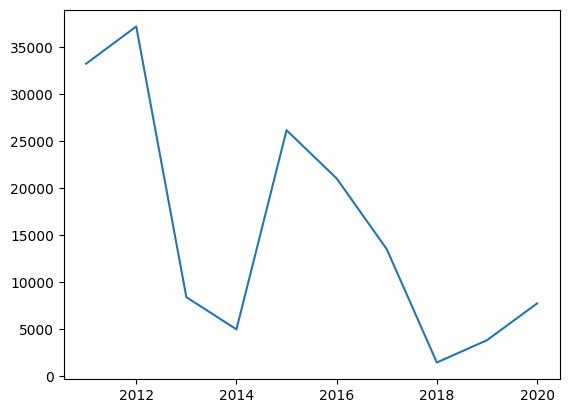

In [74]:
casosPorAno = Fortaleza.groupby(Fortaleza.index.year).sum()

plt.plot(casosPorAno)
plt.show()

### b. Crie gráficos temporal apresentando algumas médias móveis para o número de casos de Dengue em Fortaleza.

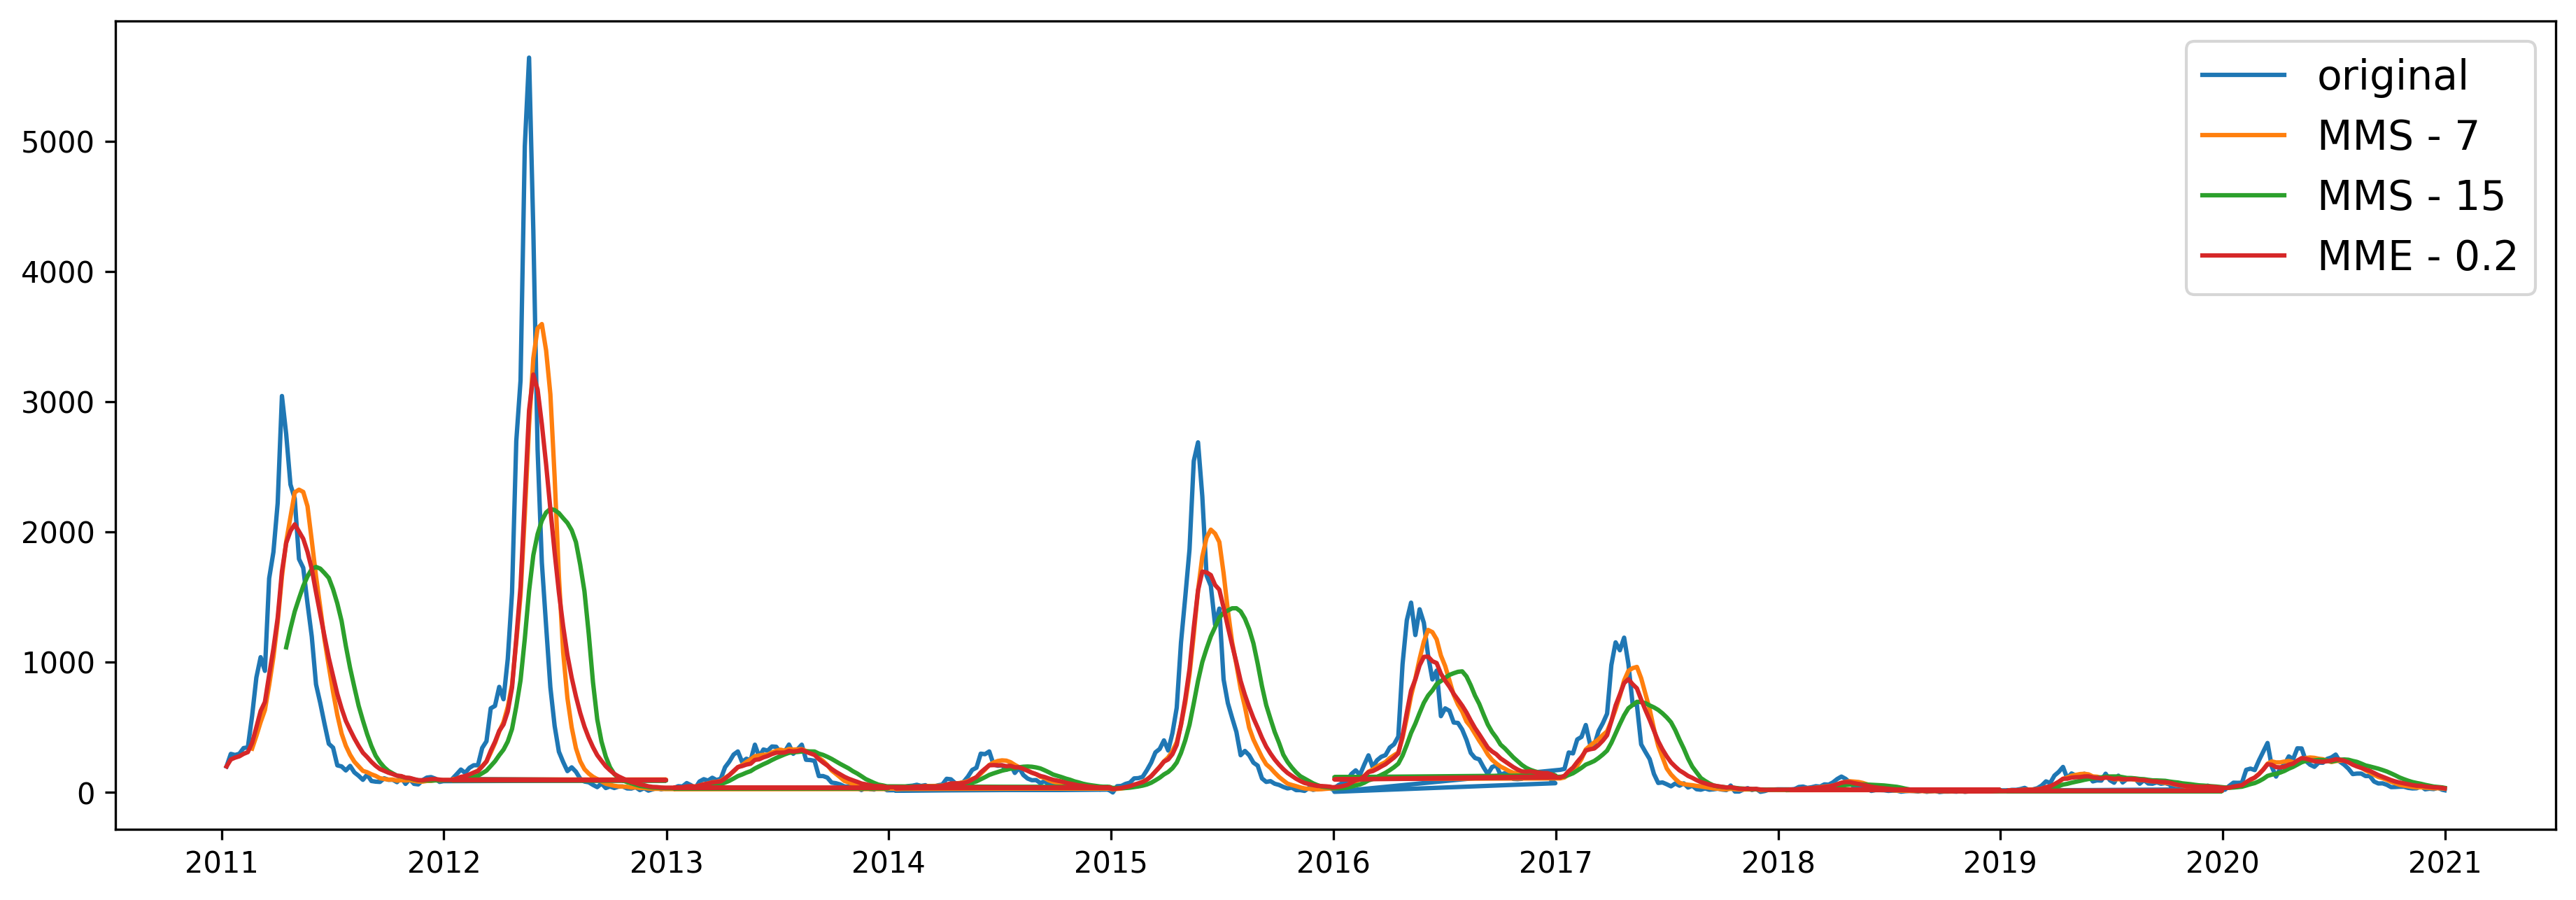

In [75]:
plt.figure(figsize=(15,5),dpi=300)
plt.plot(Fortaleza,label='original')
plt.plot(Fortaleza.rolling(7).mean(),label='MMS - 7')
plt.plot(Fortaleza.rolling(15).mean(),label='MMS - 15')
plt.plot(Fortaleza.ewm(alpha=0.2).mean(),label='MME - 0.2')
plt.legend(fontsize=14)

### c. O dado é estacionário?

In [76]:
from statsmodels.tsa.stattools import kpss

def is_stationary(xx):
    kpssx=kpss(xx)
    valorcritico=kpssx[3]['5%']
    teste=kpssx[0]
    if teste > valorcritico:
        texto='A série NÃO é estacionária'
    else:
        texto="A série É estacionária"
        
    return texto

In [77]:
is_stationary(Fortaleza)

'A série NÃO é estacionária'

### d. O dado apresenta uma distribuição normal?

In [78]:
import scipy.stats as stats

def is_normal(x):
    e,p=stats.shapiro(x)
    texto="A série NÃO é normal"
    if p>0.05:
        texto="A série É é normal"
    return texto

In [79]:
is_normal(Fortaleza)

'A série NÃO é normal'

### e. Escolha um periodo para treinar o algum modelo de ML e faça a predição de algumas semanas posteriores. Crie um gráfico demonstrando o predição. Qual é a melhor forma de dividir o dado?

In [80]:
df=pd.DataFrame(Fortaleza)
df['SEMANA_DO_ANO']=df.index.isocalendar().week
df['ANO']=df.index.year
df['MES']=df.index.month
df['CASOS']=df[0]
df.drop(0,axis=1,inplace=True)

df.head()

,SEMANA_DO_ANO,ANO,MES,CASOS
2011-01-09,1,2011,1,200.0
2011-01-16,2,2011,1,296.0
2011-01-23,3,2011,1,288.0
2011-01-30,4,2011,1,297.0
2011-02-06,5,2011,2,341.0


In [81]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X=df.dropna(axis=0)[['MES']].values
Y=df.dropna(axis=0)[['CASOS']].values

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
model=XGBRegressor()
model.fit(x_train,y_train)
df['PREDICAO']=model.predict(df[['MES']].values)

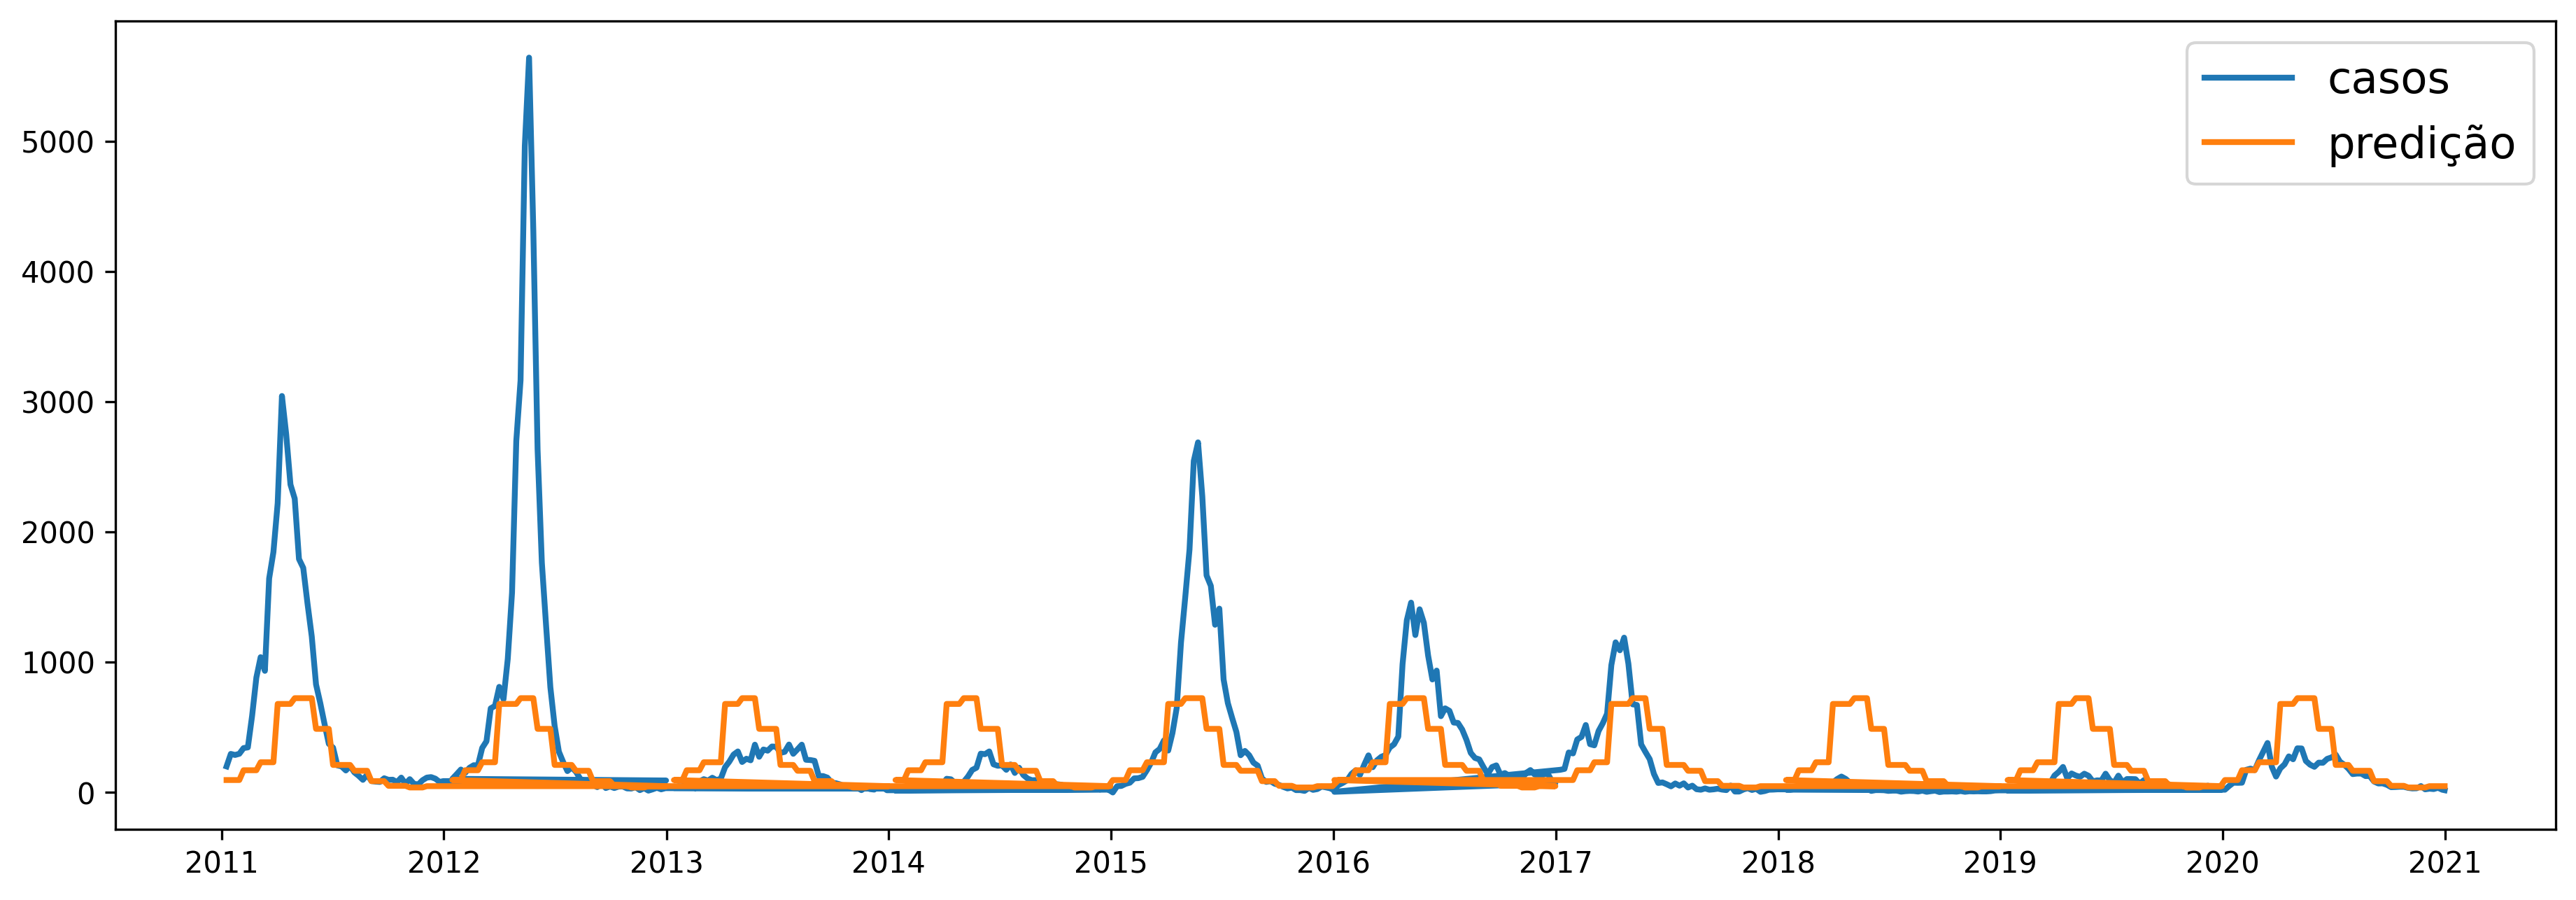

In [82]:
plt.figure(dpi=300,figsize=(15,5))
plt.plot(df['CASOS'],label='casos',lw=2)
plt.plot(df['PREDICAO'], label='predição',lw=2)
plt.legend(fontsize=15)
plt.show()

In [85]:
df2=pd.DataFrame()
nsplit=4
for i in range(nsplit+1):
    if i<nsplit:
        coluna=f'T_{i}'
        df2[coluna]=df['CASOS'].shift(-i).values
    if i==nsplit:
        coluna='TARGET'
        df2[coluna]=df['CASOS'].shift(-i).values

df2.dropna(axis=0,inplace=True)

In [86]:
df2

,T_0,T_1,T_2,T_3,TARGET
0,200.0,296.0,288.0,297.0,341.0
1,296.0,288.0,297.0,341.0,346.0
2,288.0,297.0,341.0,346.0,589.0
3,297.0,341.0,346.0,589.0,883.0
4,341.0,346.0,589.0,883.0,1039.0
...,...,...,...,...,...
514,31.0,32.0,49.0,24.0,29.0
515,32.0,49.0,24.0,29.0,26.0
516,49.0,24.0,29.0,26.0,36.0
517,24.0,29.0,26.0,36.0,21.0


In [101]:

def getProximaLinhaParaPrevisao(df):
    return df2.iloc[len(df2) -1].values[1:nsplit+1]

getProximaLinhaParaPrevisao(df2)

array([26., 36., 21., 17.])

In [102]:
X=df2.drop('TARGET',axis=1).values
Y=df2['TARGET'].values
model=XGBRegressor()
model.fit(X,Y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [103]:
for i in range(10):
    proximaLinhaParaPrevisao = getProximaLinhaParaPrevisao(df2)
    previsao=model.predict(np.array([proximaLinhaParaPrevisao]))
    print(f'Previsão para o próximo mês: {previsao[0]:.0f}')
    df2.loc[len(df2)]=np.append(proximaLinhaParaPrevisao,previsao[0])


plt.figure(dpi=300,figsize=(15,5))

array([37.241417], dtype=float32)

In [ ]:
ultimalinha=ultimalinha+list(model.predict(np.array([ultimalinha])))
ultimalinha

[26.0, 36.0, 21.0, 17.0, 37.241417]

In [ ]:
daux=pd.DataFrame([ultimalinha],columns=df2.columns)
daux

,T_0,T_1,T_2,T_3,TARGET
0,26.0,36.0,21.0,17.0,37.241417


In [ ]:
df2=pd.concat([df2,daux],ignore_index=True)

In [ ]:
df2

,T_0,T_1,T_2,T_3,TARGET
0,200.0,296.0,288.0,297.0,341.000000
1,296.0,288.0,297.0,341.0,346.000000
2,288.0,297.0,341.0,346.0,589.000000
3,297.0,341.0,346.0,589.0,883.000000
4,341.0,346.0,589.0,883.0,1039.000000
...,...,...,...,...,...
515,32.0,49.0,24.0,29.0,26.000000
516,49.0,24.0,29.0,26.0,36.000000
517,24.0,29.0,26.0,36.0,21.000000
518,29.0,26.0,36.0,21.0,17.000000


In [ ]:
serisfinal=pd.DataFrame(list(df2.drop('TARGET',axis=1).iloc[0].values) + list(df2['TARGET'].values),columns=['MES'])


In [ ]:
serisfinal

,MES
0,200.000000
1,296.000000
2,288.000000
3,297.000000
4,341.000000
...,...
519,26.000000
520,36.000000
521,21.000000
522,17.000000


In [ ]:
# # Verificar variação no nsplit
# npredicao=40
# seriesfinal=df['MES'].reset_index(drop=True).to_frame()

# for n in range(npredicao):
    
    
    
#     df=pd.DataFrame()
#     nsplit=4
#     for i in range(nsplit+1):
#         if i<nsplit:
#             coluna=f'T_{i}'
#             df[coluna]=seriesfinal['MES'].shift(-i).values
#         if i==nsplit:
#             coluna='TARGET'
#             df[coluna]=seriesfinal['MES'].shift(-i).values
    
    
    
#     ultimalinha=list(df.iloc[len(df)-nsplit].values[0:nsplit])
    
#     df=df.dropna(axis=0)
#     X=df.drop('TARGET',axis=1).values
#     Y=df[['TARGET']].values
#     model=XGBRegressor()
#     model.fit(X,Y)
#     #fazendo predicao
#     ultimalinha=ultimalinha+list(model.predict(np.array([ultimalinha])))
    
#     daux=pd.DataFrame([ultimalinha],columns=df.columns)
#     df=pd.concat([df,daux],ignore_index=True)
    
#     ultimalinha=list(df.iloc[len(df)-nsplit].values[0:nsplit])

#     seriesfinal=pd.DataFrame(list(df.drop('TARGET',axis=1).iloc[0].values)+list(df['TARGET'].values),columns=['#Passengers'])

In [ ]:
# plt.figure(dpi=300,figsize=(15,5))
# plt.plot(seriesall['#Passengers'].values,label='original',lw=5)
# plt.plot(seriesfinal,label='predição')
# plt.legend(fontsize=15)
# plt.title('NSPLIT=12')

### f. Para 2011, as séries temporais de casos de dengue entre bairros são semelhantes? Calcule a correlação entre os pares de bairros e verifique o valor médio. 